In [1]:
# Setup Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotSlope import slope

rank_data = pd.read_csv("./Resources/collegeRanksCSV.csv")

In [2]:
rank_data.head()

,SCHOOL,2008,2009,2010,2011,2012,2013,2014,2015,AVG RANK,CHG 08 VS 15
0,Princeton,1,2,1,2,1,1,1,1,1.250,0
1,Harvard,2,1,1,1,1,1,2,2,1.375,0
2,Yale,3,3,3,3,3,3,3,3,3.000,0
3,Stanford,4,4,4,5,5,6,5,4,4.625,0
4,Columbia,9,8,8,4,4,4,4,4,5.625,5


In [3]:
school=rank_data['SCHOOL']
rank_08 = rank_data['2008']
rank_09 = rank_data['2009']
rank_10 = rank_data['2010']
rank_11 = rank_data['2011']
rank_12 = rank_data['2012']
rank_13 = rank_data['2013']
rank_14 = rank_data['2014']
rank_15 = rank_data['2015']
change = rank_data['CHG 08 VS 15']

In [4]:
rank_change=rank_data.sort_values(by='CHG 08 VS 15', ascending=False)
top_10_change =rank_change.head(10)
top_10_change = top_10_change.drop(['AVG RANK', 'CHG 08 VS 15', '2008'], axis=1)
top_10 = top_10_change.set_index('SCHOOL')

In [5]:
top_10_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 69 to 92
Data columns (total 8 columns):
SCHOOL    10 non-null object
2009      10 non-null int64
2010      10 non-null int64
2011      10 non-null int64
2012      10 non-null int64
2013      10 non-null int64
2014      10 non-null int64
2015      10 non-null int64
dtypes: int64(7), object(1)
memory usage: 720.0+ bytes


In [6]:
rank_change=rank_data.sort_values(by='CHG 08 VS 15', ascending=True)
bottom_10_change =rank_change.head(10)
bottom_10_change = bottom_10_change.drop(['AVG RANK', 'CHG 08 VS 15', '2008'], axis=1)
bottom_10 = bottom_10_change.set_index('SCHOOL')

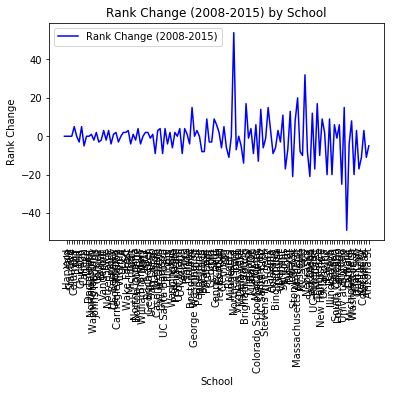

In [7]:
#Build Plot for Rank Change
rank_change= plt.plot(school, change, color="blue", label="Rank Change (2008-2015)" )
plt.legend()
plt.xticks(rotation = 90)
plt.xticks(range(1, 125, 1))
plt.rcParams["figure.figsize"] = [16,9]
plt.title("Rank Change (2008-2015) by School")
plt.ylabel("Rank Change")
plt.xlabel("School")
plt.show()

In [8]:
#Northeastern
max(change)

54

In [9]:
#Howard University 
min(change)

-49

In [10]:
#Filter for Yearly Rank Data Only
df = rank_data.drop(['AVG RANK', 'CHG 08 VS 15', '2008'], axis=1)
df = df.set_index('SCHOOL')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, Princeton to Arizona St
Data columns (total 7 columns):
2009    125 non-null int64
2010    125 non-null int64
2011    125 non-null int64
2012    125 non-null int64
2013    125 non-null int64
2014    125 non-null int64
2015    125 non-null int64
dtypes: int64(7)
memory usage: 7.8+ KB


In [12]:
#Make Bump Chart
# from plotSlope import slope
# f = slope(df,height=12,width=8,font_size=20, savename='all_ranks.png')  

In [13]:
top_color  = {"Univ at Buffalo":'red',
          'TCU':'orange',
          'Brigham Young':'chocolate',
          'Massachusetts Amherst': 'green', 
          'Florida St':'blue',
          'Northeastern':'navy',
          'Drexel':'purple',
          'American':'brown',
          'Clark':'maroon'}

C:\Users\zhiyi\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['GillSans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


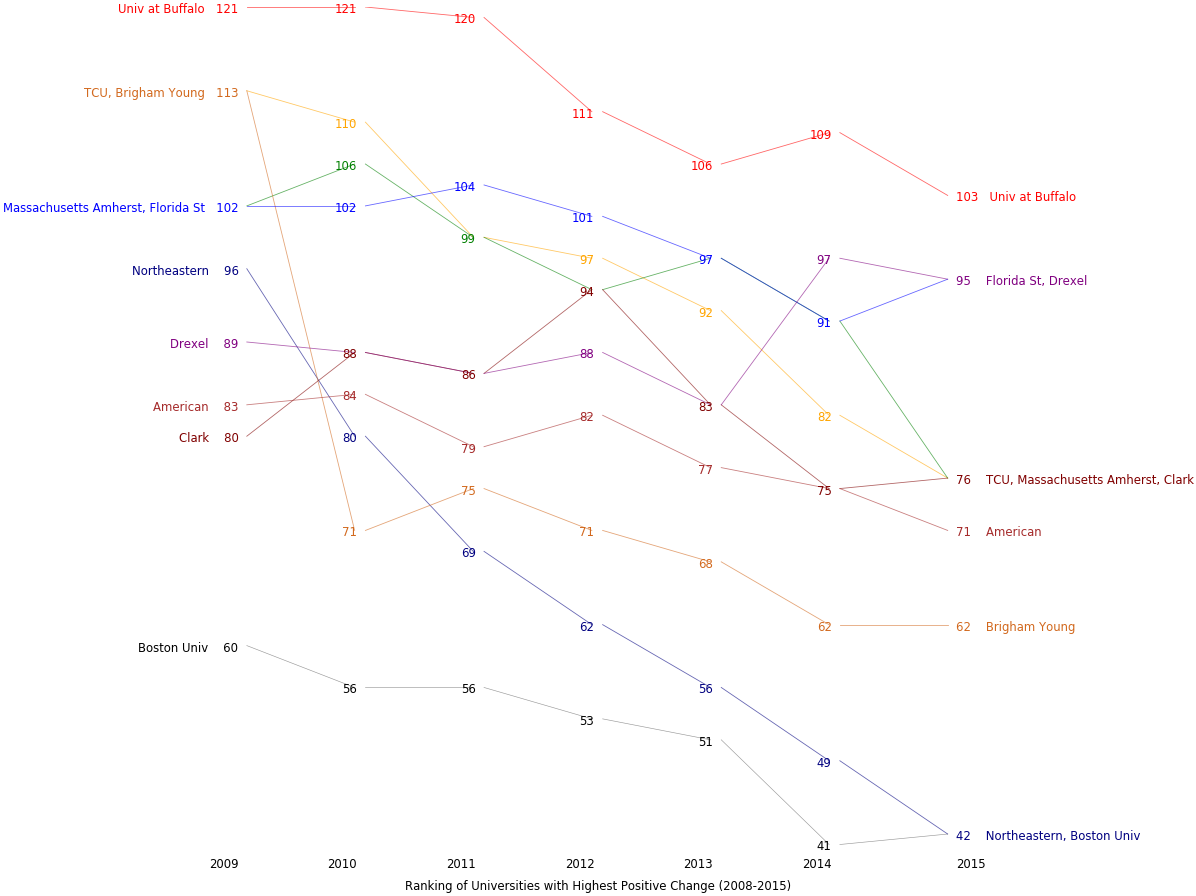

In [14]:
f = slope(top_10,color = top_color, height=30,width=40,font_size=28, savename='top_ranks.png', title = 'Ranking of Universities with Highest Positive Change (2008-2015)')  

In [15]:
bot_color  = {"Howard":'red',
          'Washington St':'orange',
          'Ohio Univ':'chocolate',
          'Arizona': 'green', 
          'Pacific':'blue',
          'Illinois Tech':'navy',
          'UC Riverside':'purple',
          'Iowa St':'brown',
          'St. Louis':'maroon',
             'Kansas': 'black'}

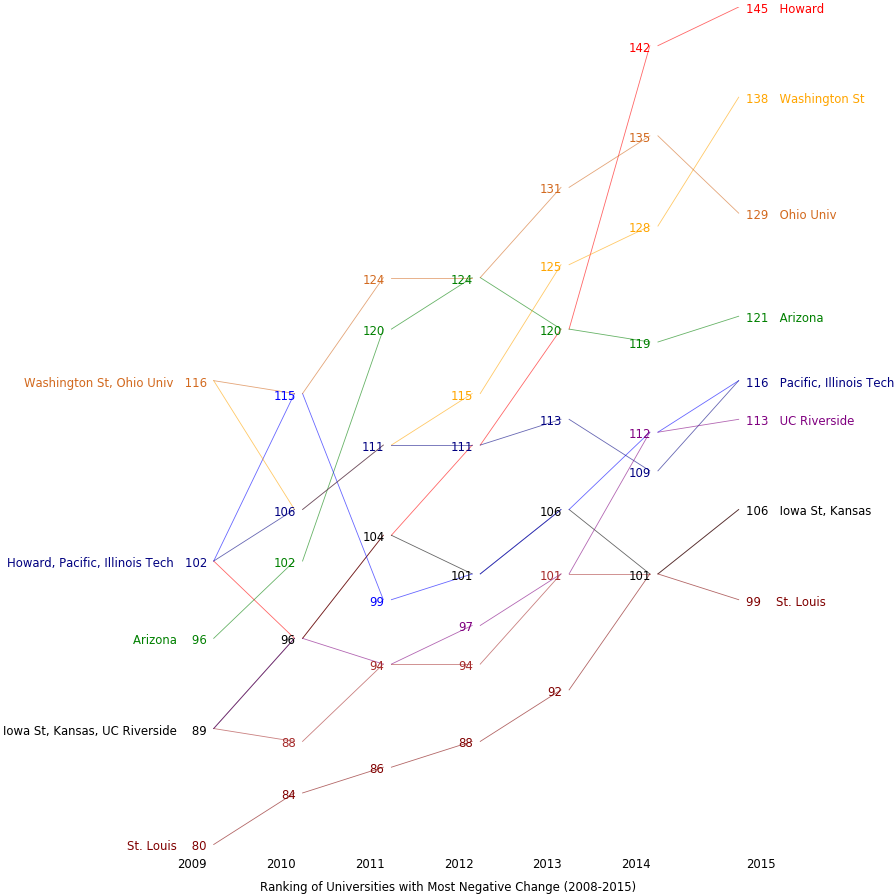

In [16]:
f = slope(bottom_10, color = bot_color, height=30,width=30,font_size=28, savename='bot_ranks.png',  title = 'Ranking of Universities with Most Negative Change (2008-2015)' )  

In [17]:
#Make Rankings Negative to Invert Charts
rank_09 = top_10['2009']
neg_09= [ -x for x in rank_09]
rank_10 = top_10['2010']
neg_10= [ -x for x in rank_10]
rank_11 = top_10['2011']
neg_11= [ -x for x in rank_11]
rank_12 = top_10['2012']
neg_12= [ -x for x in rank_12]
rank_13 = top_10['2013']
neg_13= [ -x for x in rank_13]
rank_14 = top_10['2014']
neg_14= [ -x for x in rank_14]
rank_15 = top_10['2015']
neg_15= [ -x for x in rank_15]

In [18]:
#Make Rankings Negative to Invert Charts
rank_09 = bottom_10['2009']
bneg_09= [-x for x in rank_09]
rank_10 = bottom_10['2010']
bneg_10= [ -x for x in rank_10]
rank_11 = bottom_10['2011']
bneg_11= [ -x for x in rank_11]
rank_12 = bottom_10['2012']
bneg_12= [ -x for x in rank_12]
rank_13 = bottom_10['2013']
bneg_13= [ -x for x in rank_13]
rank_14 =  bottom_10 ['2014']
bneg_14= [ -x for x in rank_14]
rank_15 =  bottom_10['2015']
bneg_15= [ -x for x in rank_15]

In [19]:
type(rank_09)

pandas.core.series.Series

In [20]:
# - top_10['2009']

In [21]:
top_10['2009'] = neg_09
neg_09 

[-96, -113, -102, -113, -102, -60, -121, -80, -83, -89]

In [22]:
top_10['2010'] = neg_10
top_10['2011'] = neg_11
top_10['2012'] = neg_12
top_10['2013'] = neg_13
top_10['2014'] = neg_14
top_10['2015'] = neg_15

In [23]:
bottom_10['2009'] = bneg_09
bottom_10['2010'] = bneg_10
bottom_10['2011'] = bneg_11
bottom_10['2012'] = bneg_12
bottom_10['2013'] = bneg_13
bottom_10['2014'] = bneg_14
bottom_10['2015'] = bneg_15
bottom_10

,2009,2010,2011,2012,2013,2014,2015
SCHOOL,,,,,,,
Howard,-102,-96,-104,-111,-120,-142,-145
Arizona,-96,-102,-120,-124,-120,-119,-121
Iowa St,-89,-88,-94,-94,-101,-101,-106
Kansas,-89,-96,-104,-101,-106,-101,-106
Pacific,-102,-115,-99,-101,-106,-112,-116
Washington St,-116,-106,-111,-115,-125,-128,-138
Illinois Tech,-102,-106,-111,-111,-113,-109,-116
St. Louis,-80,-84,-86,-88,-92,-101,-99
UC Riverside,-89,-96,-94,-97,-101,-112,-113


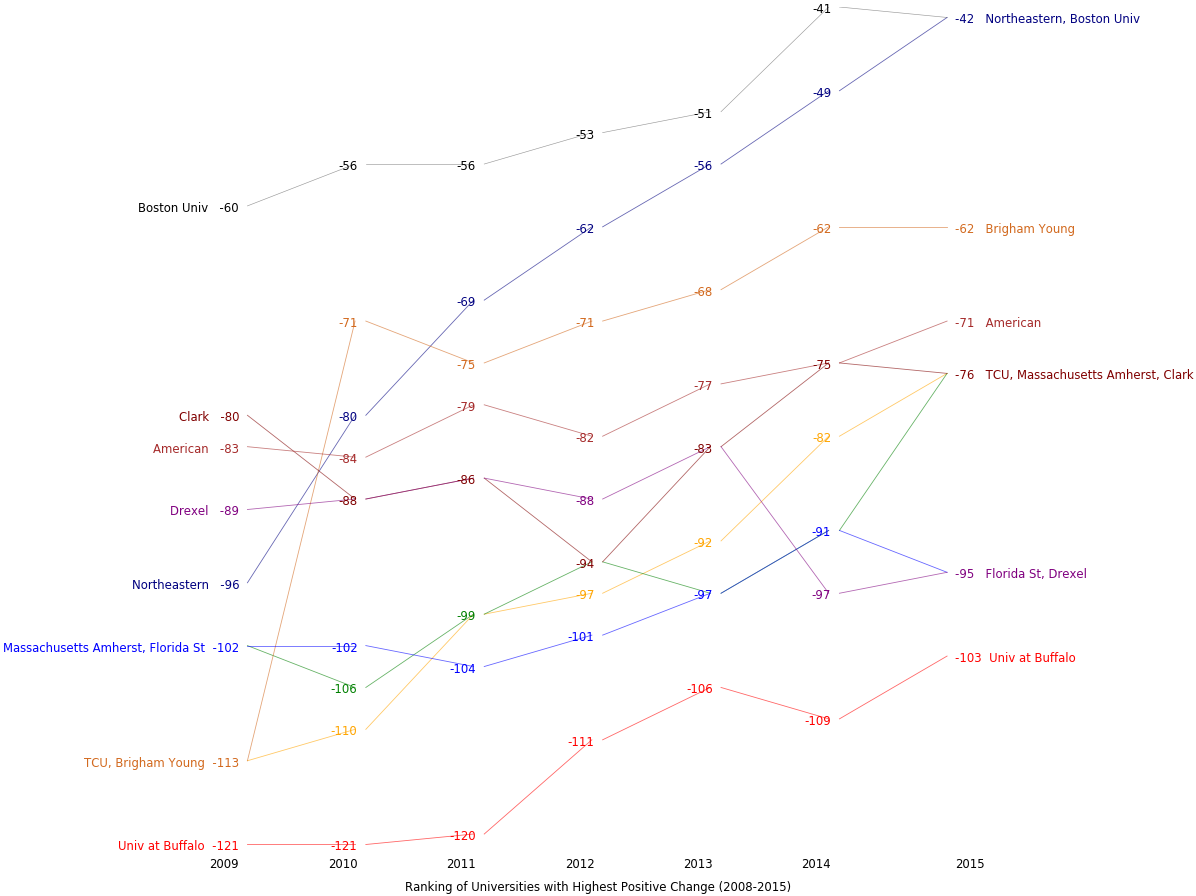

In [24]:
f = slope(top_10,color = top_color, height=30,width=40,font_size=28, savename='top_ranks.png', title = 'Ranking of Universities with Highest Positive Change (2008-2015)')  

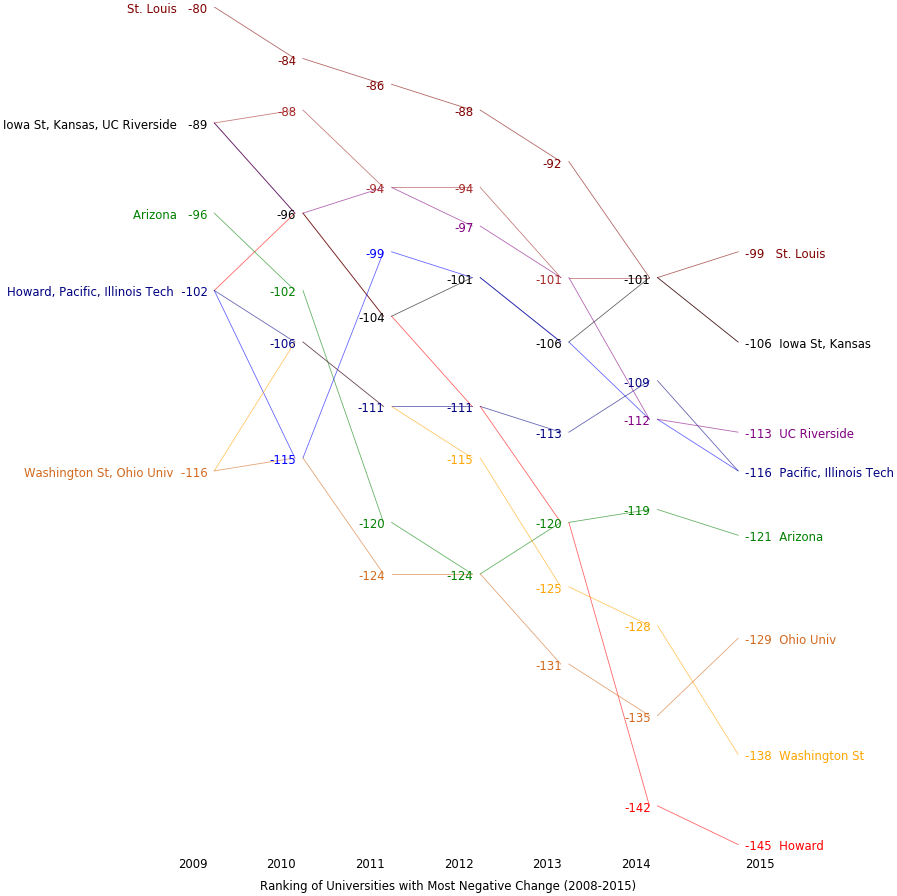

In [26]:
f = slope(bottom_10, color = bot_color, height=30,width=30,font_size=28, savename='bot_ranks.png',  title = 'Ranking of Universities with Most Negative Change (2008-2015)' )  